In [ ]:
import pandas as pd

vit_ensemble = pd.read_csv("vit_ensemble_metrics.csv")
conv_ensemble = pd.read_csv("conv_ensemble_metrics.csv")

In [ ]:
vit_base_16 = pd.read_csv("vit_base_16_metrics.csv")
convnext = pd.read_csv("convnext_metrics.csv")

In [ ]:
vit_ensemble.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
vit_ensemble.describe()

In [ ]:
conv_ensemble.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
conv_ensemble.describe()

In [ ]:
vit_base_16.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
vit_base_16.describe()

In [ ]:
convnext.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
convnext.describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
all_metrics = pd.concat([vit_ensemble, conv_ensemble, vit_base_16, convnext], axis=0)
all_metrics["model"] = (
    ["vit_ensemble"] * vit_ensemble.shape[0]
    + ["conv_ensemble"] * conv_ensemble.shape[0]
    + ["vit_base_16"] * vit_base_16.shape[0]
    + ["convnext"] * convnext.shape[0]
)

all_metrics
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_metrics, x=all_metrics.index, y="test/Accuracy", hue="model")

plt.xlabel("Trial Number")

plt.ylabel("Accuracy")
plt.title("Accuracy of Models")

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=all_metrics, x=all_metrics.index, y="test/BalancedAccuracy", hue="model"
)

plt.xlabel("Trial Number")
plt.ylabel("Balanced Accuracy")
plt.title("Balanced Accuracy of Models")

In [ ]:
import scipy.stats as stats
# we use the qq plots to check if data is normally distributed
plt.figure(figsize=(10, 6))
stats.probplot(vit_ensemble["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("VIT Ensemble Balanced Accuracy QQ Plot")

plt.figure(figsize=(10, 6))
stats.probplot(conv_ensemble["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("Conv Ensemble Balanced Accuracy QQ Plot")

plt.figure(figsize=(10, 6))
stats.probplot(vit_base_16["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("VIT Base 16 Balanced Accuracy QQ Plot")

plt.figure(figsize=(10, 6))
stats.probplot(convnext["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("ConvNext Balanced Accuracy QQ Plot")


In [ ]:
# check that the data is normally distributed
# for that we use Shapiro-Wilk test for normality
can_make_anova = True
shapiro_stat, shapiro_p = stats.shapiro(vit_base_16["test/BalancedAccuracy"])
print(shapiro_stat, shapiro_p)
if shapiro_p < 0.05:
    print("The data vit base 16 is not normally distributed")
    can_make_anova = False
else:
    print("The data vit base 16 is normally distributed")

shapiro_stat, shapiro_p = stats.shapiro(convnext["test/BalancedAccuracy"])
print(shapiro_stat, shapiro_p)
if shapiro_p < 0.05:
    print("The data convnext is not normally distributed")
    can_make_anova = False
else:
    print("The data convnext is normally distributed")

shapiro_stat, shapiro_p = stats.shapiro(vit_ensemble["test/BalancedAccuracy"])
print(shapiro_stat, shapiro_p)
if shapiro_p < 0.05:
    print("The data vit ensemble is not normally distributed")
    can_make_anova = False
else:
    print("The data vit ensemble is normally distributed")

shapiro_stat, shapiro_p = stats.shapiro(conv_ensemble["test/BalancedAccuracy"])
print(shapiro_stat, shapiro_p)
if shapiro_p < 0.05:
    print("The data conv ensemble is not normally distributed")
    can_make_anova = False
else:
    print("The data conv ensemble is normally distributed")


In [ ]:
# Levene test is for equal variances
levene_stat, levene_p = stats.levene(
    vit_ensemble["test/BalancedAccuracy"],
    conv_ensemble["test/BalancedAccuracy"],
    vit_base_16["test/BalancedAccuracy"],
    convnext["test/BalancedAccuracy"],
)
print(levene_stat, levene_p)
if levene_p < 0.05:
    print("The variances are not equal")
    can_make_anova = False
else:
    print("The variances are equal")

In [ ]:
# ANOVA test
fvalue, pvalue = stats.f_oneway(
    vit_ensemble["test/BalancedAccuracy"],
    conv_ensemble["test/BalancedAccuracy"],
    vit_base_16["test/BalancedAccuracy"],
    convnext["test/BalancedAccuracy"],
)

print(fvalue, pvalue)
if pvalue < 0.05:
    print("Reject the null hypothesis, the means are not equal")
    print("There is a significant difference between the models in terms of balanced accuracy")
else:
    print("Fail to reject the null hypothesis, the means are equal")
    print("There is no significant difference between the models in terms of balanced accuracy")


      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1       group2    meandiff p-adj  lower   upper  reject
----------------------------------------------------------------
conv_ensemble     convnext  -0.0679   0.0 -0.0705 -0.0652   True
conv_ensemble  vit_base_16  -0.0415   0.0 -0.0442 -0.0388   True
conv_ensemble vit_ensemble   0.0077   0.0  0.0051  0.0104   True
     convnext  vit_base_16   0.0264   0.0  0.0237   0.029   True
     convnext vit_ensemble   0.0756   0.0   0.073  0.0783   True
  vit_base_16 vit_ensemble   0.0493   0.0  0.0466  0.0519   True
----------------------------------------------------------------


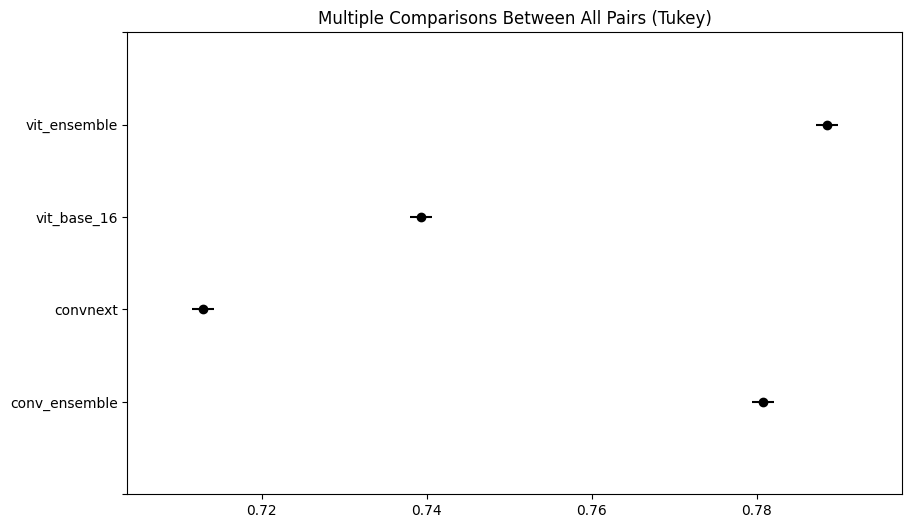

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# we can use Tukey's HSD test to find out which models are different
# the tukeyhsd test performs multiple pairwise comparisons using the studentized range distribution
m_comp = pairwise_tukeyhsd(
    all_metrics["test/BalancedAccuracy"], all_metrics["model"]
)
print(m_comp)
m_comp.plot_simultaneous()
plt.show()